In [35]:
from astropy.io import fits
import numpy as np
from matplotlib import pyplot
from matplotlib.backends.backend_pdf import PdfPages

import os
import sys
import glob

sys.path.append('/dark/bostroem/research/ASASSN15oz/code')
import util

%matplotlib inline

In [36]:
FIG_DIR = '../figures'
DATA_DIR = '../data/EFOSC'

## Figure out which file has the second orer light corrected sensitivity curve

In [37]:
flist = ['../data/EFOSC/20151004/sens_20151003_Gr13_Free_l745a_57687_1.fits',
 '../data/EFOSC/20151004/sens_20151003_Gr13_Free_l745a_57687_1_2ord.fits',
 '../data/EFOSC/20151004/sens_20151003_Gr13_GG495_l745a_57687_1.fits']

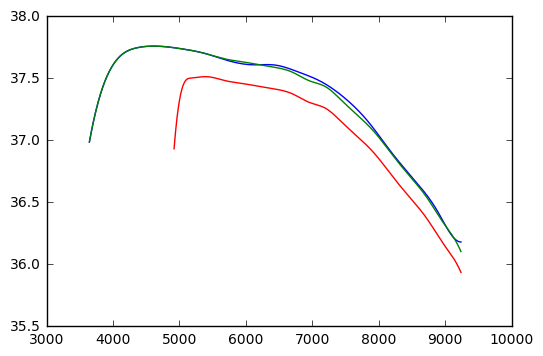

In [38]:
for ifile in flist:
    ofile = fits.open(ifile)
    sens = ofile[0].data
    wl = util.calc_wavelength(ofile[0].header, np.arange(len(sens))+1)
    pyplot.plot(wl, sens)

## Plot Sensitivity for each night 

In [39]:
flist = glob.glob(os.path.join(DATA_DIR, '201?????', 'sens*2ord.fits'))
dir_list = []
for ifile in flist:
    dir_list.append(ifile.split('/')[3])
dir_uniq_list = list(set(dir_list))
dir_uniq_list.sort()
flist = np.array(flist)
dir_list = np.array(dir_list)

In [40]:
with PdfPages(os.path.join(FIG_DIR, 'sens_by_night.pdf')) as pdf:
    for idir in dir_uniq_list:
        iflist = flist[dir_list == idir]
        pyplot.figure(figsize = [15, 10])
        for ifile in iflist:
            ofile = fits.open(ifile)
            sens = ofile[0].data
            wl = util.calc_wavelength(ofile[0].header, np.arange(len(sens))+1)
            pyplot.plot(wl, sens, label = '{}'.format(os.path.basename(ifile)))
        pyplot.ylim(32, 40)
        pyplot.title(idir)
        pyplot.legend(loc = 'best')
        pdf.savefig()
        pyplot.close()

## Plot normalized sensitivity by night 

In [41]:
with PdfPages(os.path.join(FIG_DIR, 'sens_by_night_norm.pdf')) as pdf:
    for idir in dir_uniq_list:
        iflist = flist[dir_list == idir]
        pyplot.figure(figsize = [15, 10])
        for ifile in iflist:
            ofile = fits.open(ifile)
            sens = ofile[0].data
            wl = util.calc_wavelength(ofile[0].header, np.arange(len(sens))+1)
            pyplot.plot(wl, sens/sens.max(), label = '{}'.format(os.path.basename(ifile)))
        pyplot.ylim(0.94, 1.01)
        pyplot.grid()
        pyplot.title(idir)
        pyplot.legend(loc = 'best')
        pdf.savefig()
        pyplot.close()

## Plot all nights normalized

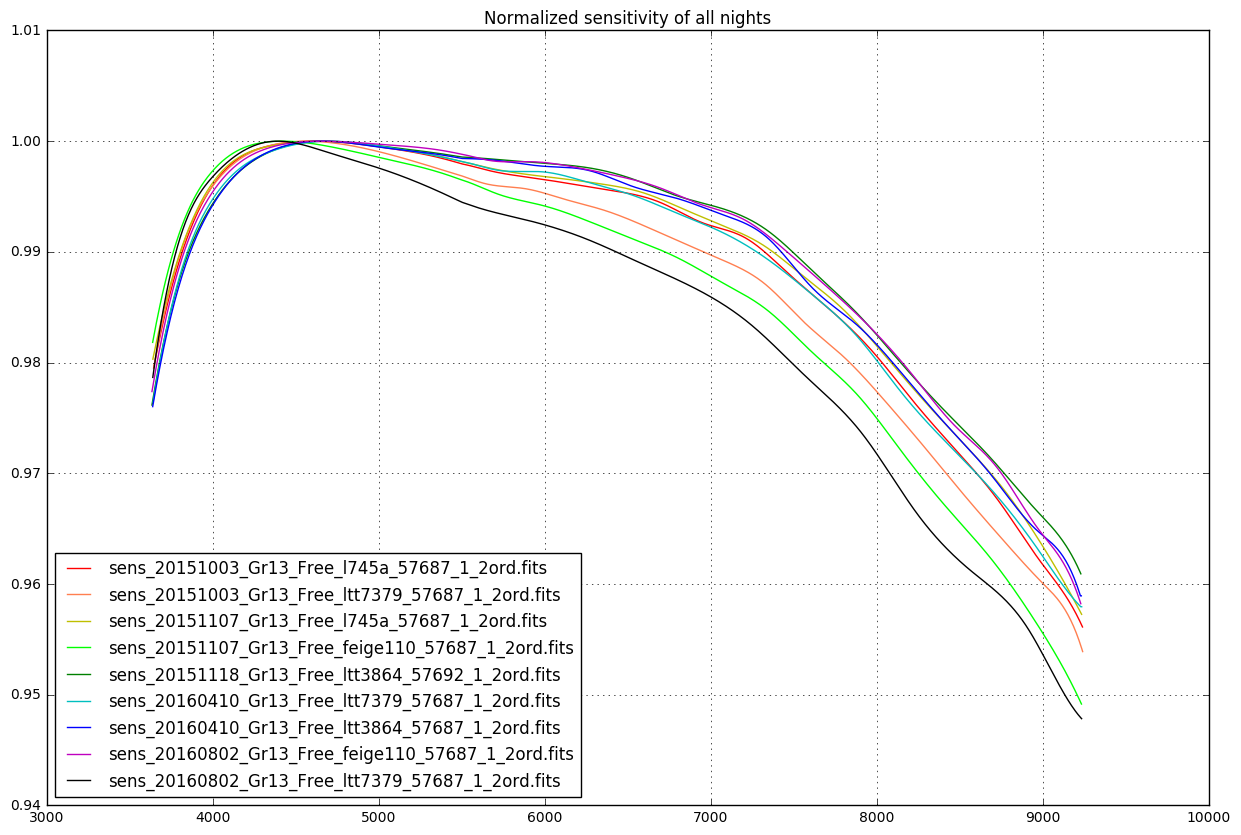

In [42]:
fig = pyplot.figure(figsize = [15, 10])
timeord_flist = []
for idir in dir_uniq_list:
    iflist = flist[dir_list == idir]
    timeord_flist+=list(iflist)
colors = ['r', 'coral', 'y', 'lime', 'g', 'c', 'b', 'm','k']
for c, ifile in zip(colors, timeord_flist):
    ofile = fits.open(ifile)
    sens = ofile[0].data
    wl = util.calc_wavelength(ofile[0].header, np.arange(len(sens))+1)
    pyplot.plot(wl, sens/sens.max(), label = '{}'.format(os.path.basename(ifile)), color = c)
    pyplot.ylim(0.94, 1.01)
    pyplot.grid()
    pyplot.title('Normalized sensitivity of all nights')
    pyplot.legend(loc = 'best')
pyplot.savefig(os.path.join(FIG_DIR, 'norm_sens_all_night.pdf'))

## Look for trend with Standard

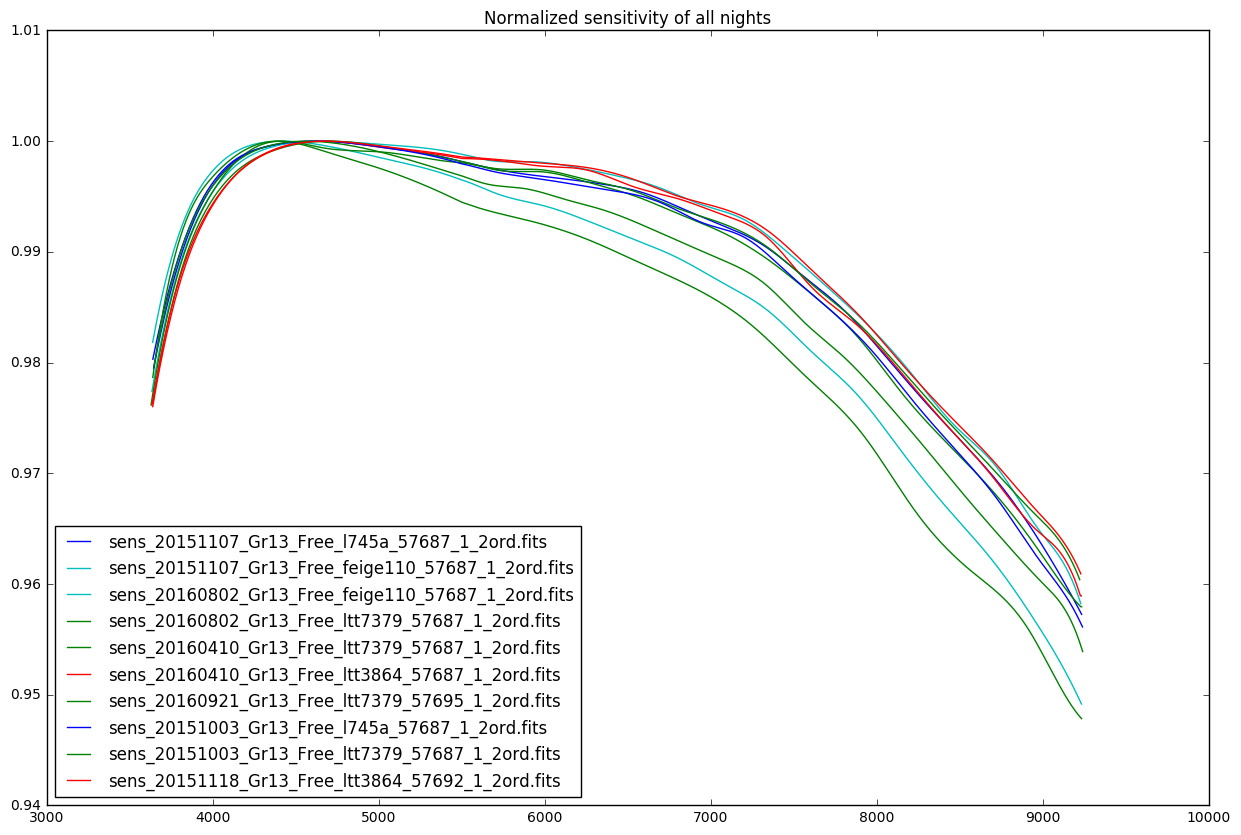

In [43]:
standards = ['l745a', 'ltt7379', 'feige110', 'ltt3864']
fig = pyplot.figure(figsize = [15, 10])
for ifile in flist:
    if 'l745a' in ifile:
        c = 'b'
    elif 'ltt7379' in ifile:
        c = 'g'
    elif 'ltt3864' in ifile:
        c = 'r'
    elif 'feige110' in ifile:
        c = 'c'
    ofile = fits.open(ifile)
    sens = ofile[0].data
    wl = util.calc_wavelength(ofile[0].header, np.arange(len(sens))+1)
    pyplot.plot(wl, sens/sens.max(), label = '{}'.format(os.path.basename(ifile)), color = c)
    pyplot.ylim(0.94, 1.01)
    pyplot.grid()
    pyplot.title('Normalized sensitivity of all nights')
    pyplot.legend(loc = 'best')
pyplot.savefig(os.path.join(FIG_DIR, 'norm_sens_all_night_color_by_std.pdf'))

## Look for trend with night

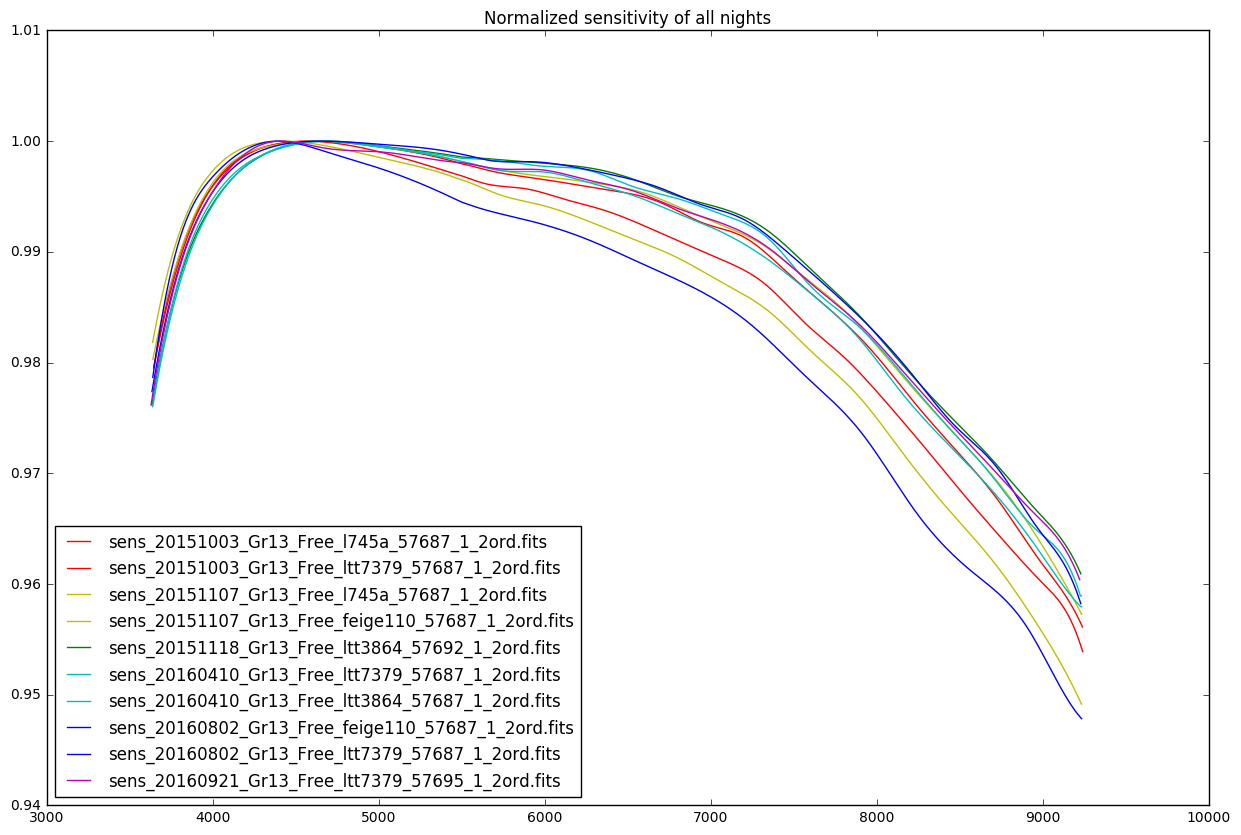

In [44]:
fig = pyplot.figure(figsize = [15, 10])

colors = ['r',  'y',  'g', 'c', 'b', 'm','k']
for c,  idir in zip(colors, dir_uniq_list):
    iflist = flist[dir_list == idir]
    for ifile in iflist:
        ofile = fits.open(ifile)
        sens = ofile[0].data
        wl = util.calc_wavelength(ofile[0].header, np.arange(len(sens))+1)
        pyplot.plot(wl, sens/sens.max(), label = '{}'.format(os.path.basename(ifile)), color = c)
        pyplot.ylim(0.94, 1.01)
        pyplot.grid()
        pyplot.title('Normalized sensitivity of all nights')
        pyplot.legend(loc = 'best')
pyplot.savefig(os.path.join(FIG_DIR, 'norm_sens_all_night_trend_w_night.pdf'))